## Formulas SSB

### Fórmulas reales de SSB

Dada una señal real $m(t)$ y su transformada de Hilbert $\hat{m}(t)$, las expresiones para modulación de banda lateral única son las siguientes:

* **USB (Upper Sideband):**

$$
s_{\text{USB}}(t) = m(t) \cdot \cos(2\pi f_c t) - \hat{m}(t) \cdot \sin(2\pi f_c t)
$$

* **LSB (Lower Sideband):**

$$
s_{\text{LSB}}(t) = m(t) \cdot \cos(2\pi f_c t) + \hat{m}(t) \cdot \sin(2\pi f_c t)
$$

La única diferencia entre ambas expresiones es el signo frente al término con $\hat{m}(t)$.

---

### Fórmula para SSB con Portadora (SSB-FC)

Cuando se incluye una portadora junto con la banda lateral única, la señal transmitida tiene la forma:

$$
s_{\text{SSB-FC}}(t) = A_c \cdot \cos(2\pi f_c t) + m(t) \cdot \cos(2\pi f_c t) \pm \hat{m}(t) \cdot \sin(2\pi f_c t)
$$

Donde:

* $A_c \cdot \cos(2\pi f_c t)$: representa la portadora transmitida.
* $m(t)$: es la señal de mensaje.
* $\hat{m}(t)$: es la transformada de Hilbert de $m(t)$.
* El signo **+** corresponde a la banda lateral superior (USB), y el signo **−** a la inferior (LSB).

---

### Relación con la señal SSB sin portadora

La forma general puede expresarse como:

$$
s_{\text{SSB-FC}}(t) = A_c \cdot \cos(2\pi f_c t) + s_{\text{SSB-SC}}(t)
$$

donde $s_{\text{SSB-SC}}(t)$ es la señal modulada en banda lateral única sin portadora.

---

### Ejemplos específicos

* Para una señal **USB con portadora**:

$$
s_{\text{USB-FC}}(t) = A_c \cdot \cos(2\pi f_c t) + m(t) \cdot \cos(2\pi f_c t) + \hat{m}(t) \cdot \sin(2\pi f_c t)
$$

* Para una señal **LSB con portadora**:

$$
s_{\text{LSB-FC}}(t) = A_c \cdot \cos(2\pi f_c t) + m(t) \cdot \cos(2\pi f_c t) - \hat{m}(t) \cdot \sin(2\pi f_c t)
$$


# Testing

In [2]:
import os
import numpy as np
import soundfile as sf
import sounddevice as sd

class GetAudio:
    def get_wav_info(self, ruta_archivo):
        with sf.SoundFile(ruta_archivo) as f:
            self.audio_data = f.read(dtype='float32')
            self.audio_samplerate = f.samplerate
            self.audio_n_canales = f.channels
            self.audio_n_frames = len(f)  # número total de frames
            self.audio_duration = self.audio_n_frames / self.audio_samplerate
            self.audio_filename = os.path.basename(ruta_archivo)


# Mensaje para SSB SC

In [3]:
# Exportar clases
from ssb import SSB
from signal_plot import Signal_plot
############################ Modulación SSB mono

ssb = SSB()
plots = Signal_plot()
audio = GetAudio()

# audio.get_wav_info("../utils/music_mono.wav")
# audio.get_wav_info("../utils/audio_estereo.wav")
audio.get_wav_info("../utils/tono.wav")
# audio.get_wav_info("../utils/vowel_1.wav")

print(audio.audio_filename)
print(audio.audio_samplerate)
print(audio.audio_data.shape[0])
print(audio.audio_n_canales)

mensaje = audio.audio_data
samplerate = audio.audio_samplerate


tono.wav
44100
44100
1


# Mensaje

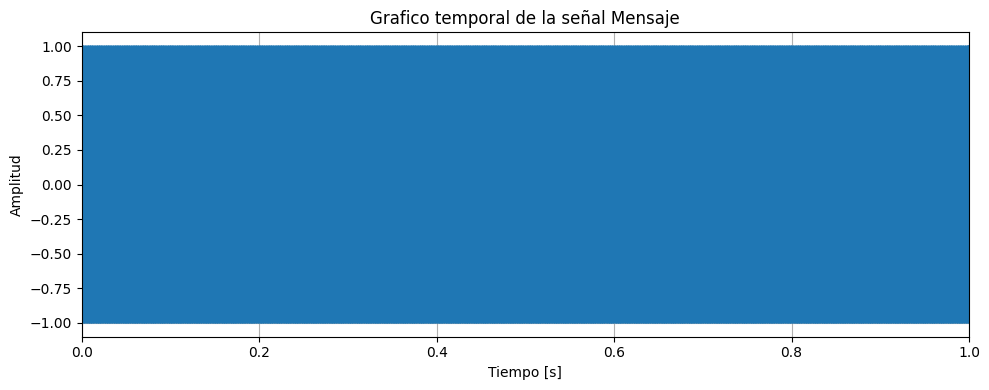

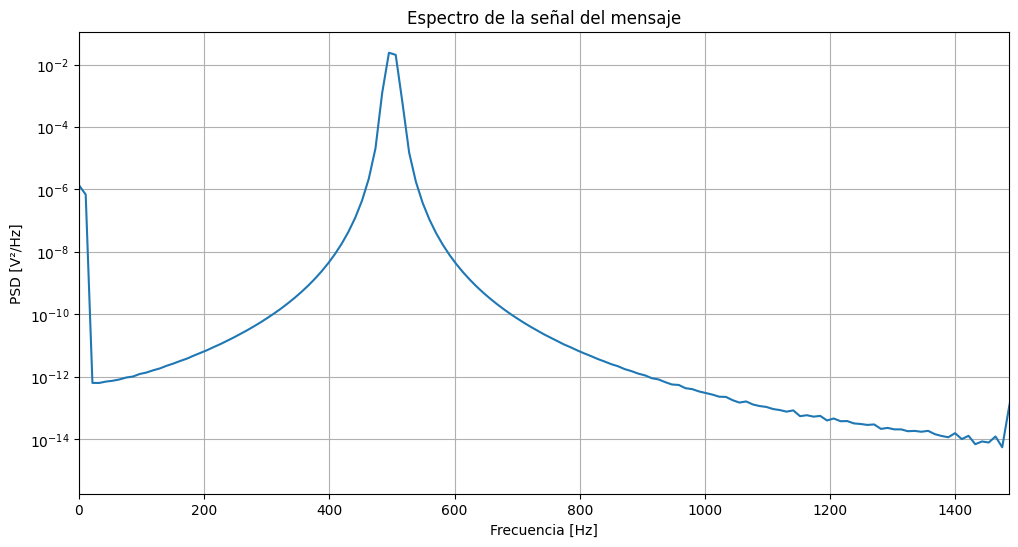

In [4]:
plots.graficar_senal("Mensaje", mensaje, samplerate, audio.audio_duration)
# plots.graficar_espectro("Espectro del mensaje", mensaje, samplerate)
plots.graficar_espectro_welch("del mensaje", mensaje, samplerate, 3)

# sd.play(audio.audio_data, audio.audio_samplerate)
# sd.wait()

# SSB SC

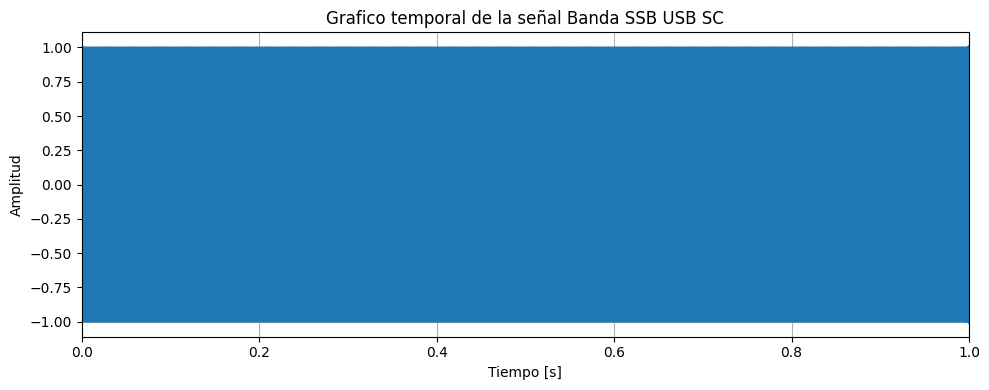

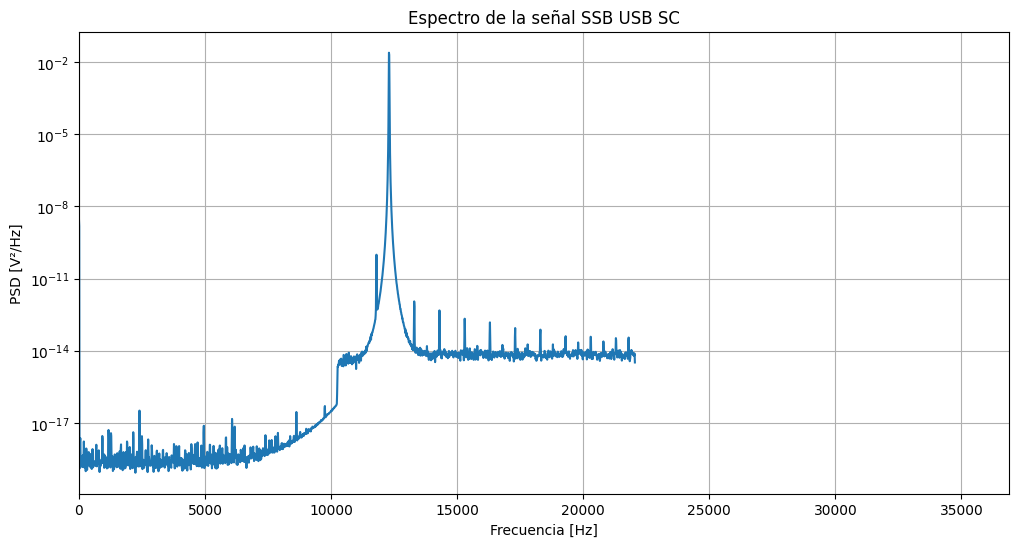

In [5]:
mensaje =  mensaje
SC_or_FC = "SC"
nombre_banda = "USB"
freq_carrier = 100000
error_fase = 0
error_frecuencia = 0

ssb_banda_lateral = ssb.ssb_mono_mod(mensaje, samplerate, SC_or_FC, nombre_banda, freq_carrier, error_fase, error_frecuencia)
plots.graficar_senal(f"Banda SSB {nombre_banda} SC", ssb_banda_lateral, samplerate, audio.audio_duration)
plots.graficar_espectro_welch(f"SSB {nombre_banda} SC", ssb_banda_lateral, samplerate, 3)

# sd.play(ssb_banda_lateral, audio.audio_samplerate)
# sd.wait()

# Demod SSB SC

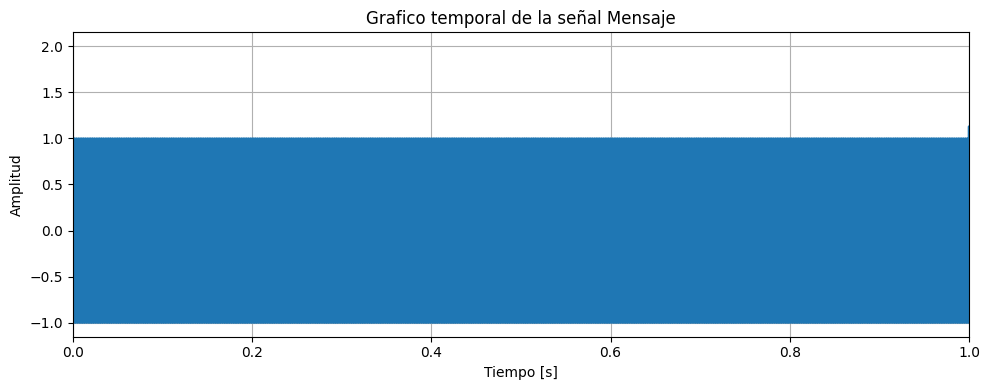

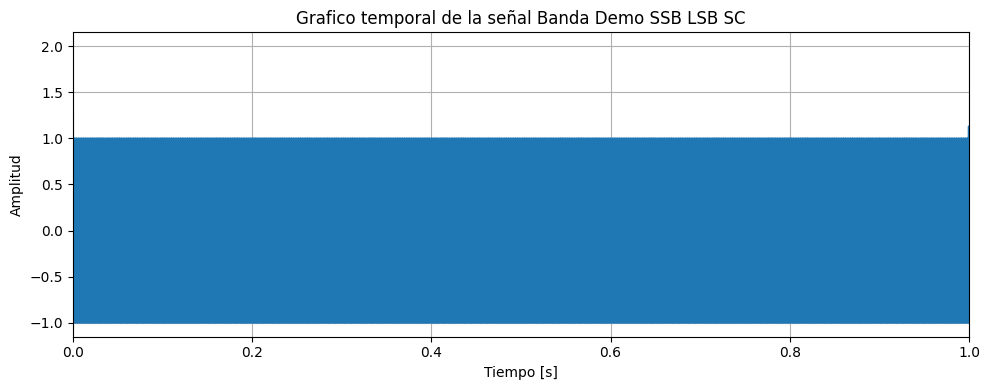

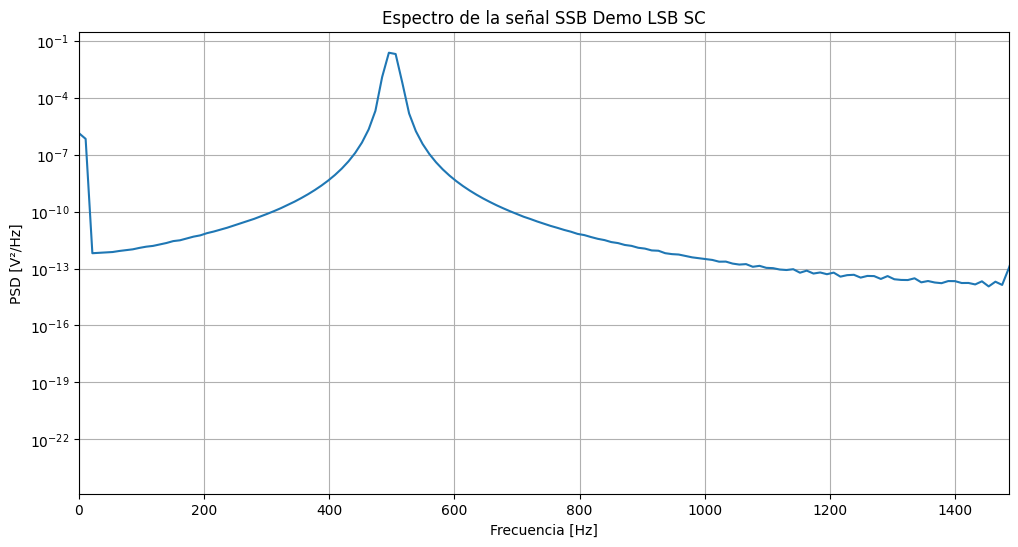

In [6]:
# cutoff = freq_carrier
ssb_banda_lateral_demod = ssb.ssb_mono_demod_sc(ssb_banda_lateral, freq_carrier, samplerate)

plots.graficar_senal("Mensaje", ssb_banda_lateral_demod, samplerate, audio.audio_duration)
plots.graficar_senal("Banda Demo SSB LSB SC", ssb_banda_lateral_demod, samplerate, audio.audio_duration)
plots.graficar_espectro_welch("SSB Demo LSB SC", ssb_banda_lateral_demod, samplerate, 3)

# sd.play(ssb_banda_lateral_demod, samplerate)
# sd.wait()